In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing , CSV file
import matplotlib.pyplot as plt
from scipy.stats import sem, t
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

import os

In [2]:
df = pd.read_csv("E:/Python/Anita Maam/loans_income.csv")
df

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


# The Bootstrap

Definition of Bootstrap

One easy and effective way to estimate the sampling distributions of a statistic or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the stastcic or model for each resample. This procedure is called the Bootstrap.

Why do we use the Bootstrap
The bootstrap is used for sample size determination; experiment with different values for n to see how the sampling distribution is affected. The algorithm for A Bootstrap

Draw a sample value, record, replace it.
Repeat n times.
Record the mean of the n resampled values.
Use the R result to:



Calculate their standard deviation.

Produce a histogram or a boxplot.

Find a confidence interval.

In [3]:
loans_income = np.array(pd.read_csv("E:/Python/Anita Maam/loans_income.csv"))
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]], dtype=int64)

In [4]:
# Making a flat list from list of lists
loans_income = np.array([item for sublist in loans_income for item in sublist])

In [5]:
def bootstrap(l,R):
    n = len(loans_income)
    # Number of Bootstrap Samples
    means_of_boot_samples =[]
    for reps in range(R):
        # Steps 1,2
        boot_sample = np.random.choice(loans_income, size=n)
        #Step 3
        means_of_boot_samples.append(round(np.mean(boot_sample),3))
    return means_of_boot_samples
    
bootstrap(loans_income, 5)

[68630.433, 68969.658, 68785.09, 68928.705, 68782.313]

Now as we have a means of bootstrap samples we can estimate:

A their standard deviation (this estimate sample mean standard deviation)

In [6]:
np.std(bootstrap(loans_income,100))

143.34288351290525

Produce a histogram or boxplo

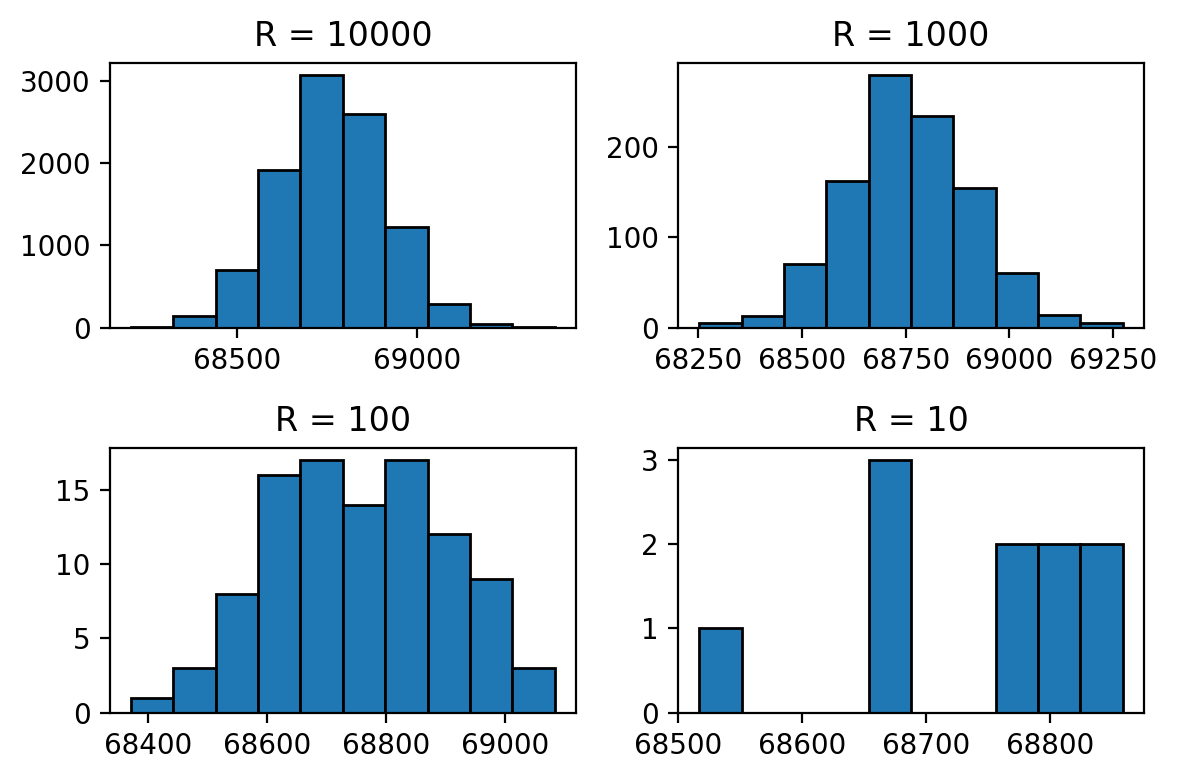

In [7]:
plt.figure(dpi = 200)

plt.subplot(221)
plt.title("R = 10000")
plt.hist(bootstrap(loans_income, 10000), edgecolor = 'k')

plt.subplot(222)
plt.title("R = 1000")
plt.hist(bootstrap(loans_income, 1000), edgecolor = 'k')

plt.subplot(223)
plt.title("R = 100")
plt.hist(bootstrap(loans_income, 100), edgecolor = 'k')

plt.subplot(224)
plt.title("R = 10")
plt.hist(bootstrap(loans_income, 10), edgecolor = 'k')

plt.tight_layout()

As we can see distribution of 10000 means is more compact and bell-shaped than the distribution with smaller amount of means. This phenomenon is termed as central limit theorem.

Find a confidence Interval

In [8]:
data = bootstrap(loans_income, 1000)
lower_lim , upper_lim = np.percentile(data , 2.5), np.percentile(data,95)
print("Lower Limit: ",lower_lim)
print("Upper Limit: ",upper_lim)

Lower Limit:  68480.24609999999
Upper Limit:  68998.2221


C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


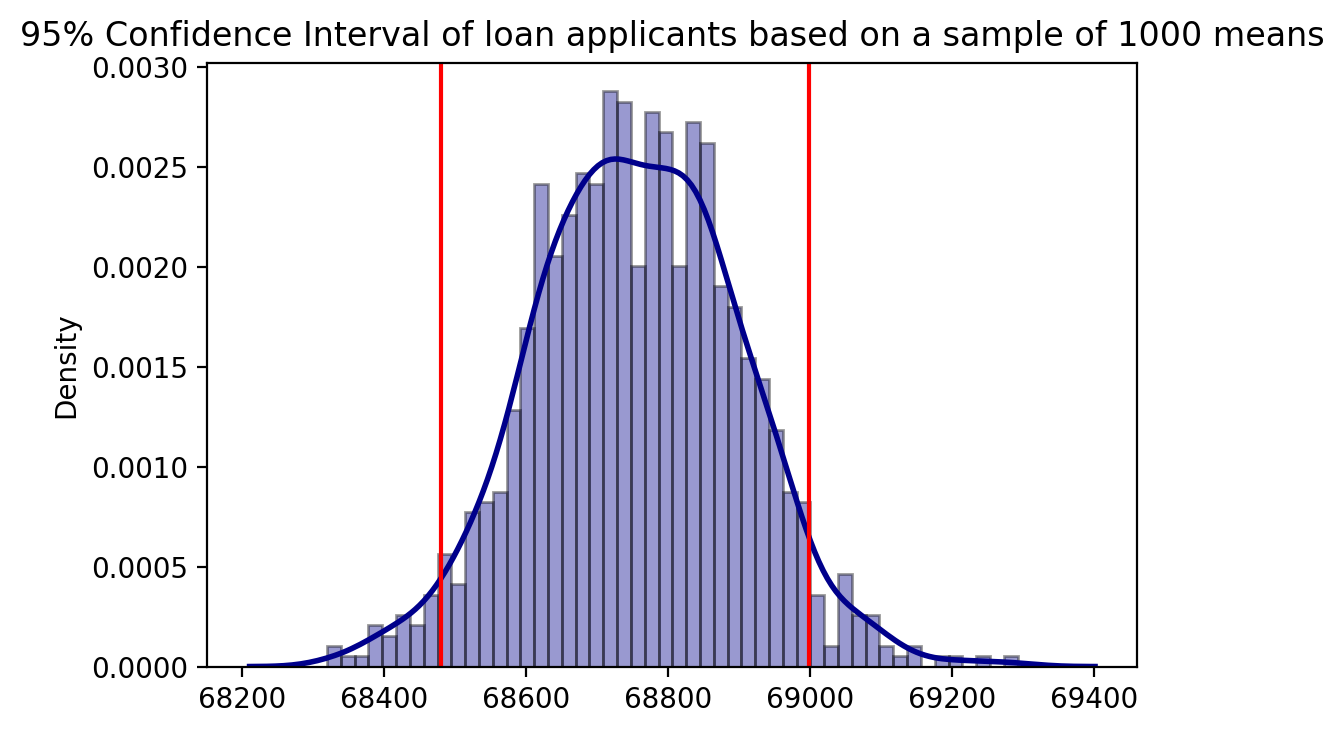

In [9]:
plt.figure(dpi = 200)
plt.title('95% Confidence Interval of loan applicants based on a sample of 1000 means')

sns.distplot(bootstrap(loans_income, 1000), hist = True, kde = True,
             color = 'darkblue', bins = 50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2})

plt.axvline(x=lower_lim,color='red')
plt.axvline(x=upper_lim,color='red')